## Carbon Emissions Demo

1. Updated: 4/22/2020
2. Owner: Victoria Hunt

In [1]:
from postreise.analyze.generation import carbon
from powersimdata.scenario.scenario import Scenario
from postreise.plot import plot_carbon_map, plot_carbon_bar

In [2]:
s224 = Scenario('224') 

SCENARIO: base | WACA_Anchor_AllMatchCA_2030_SpurUpgrade_OB_5_Mesh100x5

--> State
analyze


In [3]:
s87 = Scenario('87') 

SCENARIO: base | WesternBase_2016_noHVDC_Final_2019Sep

--> State
analyze


In [4]:
grid224 = s224.state.get_grid()
grid87 = s87.state.get_grid()

--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading sub
Loading bus2sub
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading sub
Loading bus2sub


In [5]:
carbon224_by_bus = carbon.summarize_carbon_by_bus(carbon.generate_carbon_stats(s224), grid224.plant)
carbon87_by_bus = carbon.summarize_carbon_by_bus(carbon.generate_carbon_stats(s87), grid87.plant)

--> Loading PG
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading sub
Loading bus2sub
--> Loading PG
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading sub
Loading bus2sub


In [6]:
busmap224 = plot_carbon_map.combine_bus_info_and_emission(grid224.bus, carbon224_by_bus)
busmap87 = plot_carbon_map.combine_bus_info_and_emission(grid87.bus, carbon87_by_bus)

In [7]:
plot_carbon_map.map_carbon_emission(busmap224, 'AllMatchCA 2030')


Loading BokehJS ...

plot carbon bars on map of US states

In [8]:
plot_carbon_map.map_carbon_emission_bar(busmap224, 'AllMatchCA 2030')

Loading BokehJS ...

In [9]:
#size factor allows you to adjust relative heights of vbars
plot_carbon_map.map_carbon_emission_bar(busmap87, 'Scenario 87')

Loading BokehJS ...

carbon comparion of multiple scenarios maps

In [10]:
_ = plot_carbon_map.map_carbon_emission_comparison(busmap87,  busmap224)


Loading BokehJS ...

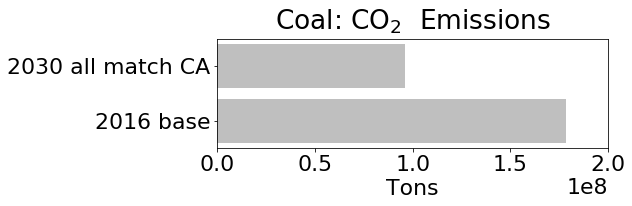

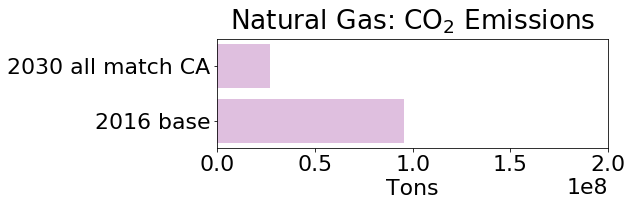

In [11]:
plot_carbon_bar.plot_carbon_bar(carbon87_by_bus, carbon224_by_bus, '2016 base', '2030 all match CA')


In [12]:
plot_carbon_bar.print_carbon_diff(carbon87_by_bus, carbon224_by_bus)

55%


Plot color coded states by renewables goals

In [13]:
western_states = ('CA', 'OR','WA','ID','MT','WY',
                 'NM', 'UT', 'NV', 'AZ','CO')
color_list = ('green','yellow','darkgreen','red','orangered','red',
             'yellowgreen','orange','yellowgreen','orangered', 'yellow')
labels_list = ('60% in 2030','25% in 2025','80% in 2030', 'n/a','15% in 2015','n/a',
              '50% in 2030', '20% in 2025','50% in 2030','15% in 2025','30% in 2020')

plot_carbon_map.plot_states(state_list = western_states,
    col_list = color_list,
    labels_list = labels_list)

Loading BokehJS ...